# Fashion MNIST dataset is given. Classify them

In [65]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
dataset = torchvision.datasets.FashionMNIST('./FashionMNIST/', train = True, transform = torchvision.transforms.ToTensor(), download = True)

0it [00:00, ?it/s]

100%|█████████▉| 26402816/26421880 [01:16<00:00, 429656.35it/s] 

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


 83%|████████▎ | 24576/29515 [00:01<00:00, 32675.35it/s]
32768it [00:01, 20067.13it/s]                           
0it [00:00, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz



  6%|▌         | 270336/4422102 [00:09<01:43, 40029.25it/s]
26427392it [01:30, 429656.35it/s]                              
 99%|█████████▊| 4366336/4422102 [00:46<00:00, 325912.75it/s]
4423680it [00:46, 372892.91it/s]                             

0it [00:00, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz




  0%|          | 0/5148 [00:01<?, ?it/s]

8192it [00:01, 5967.68it/s]             

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!



4423680it [01:01, 372892.91it/s]

In [4]:
train_set, val_set = torch.utils.data.random_split(dataset, [int(len(dataset)*.7), len(dataset) - int(len(dataset)*.7)])

# DataLoader

In [19]:
from torch.utils.data import DataLoader

train_batch_size = 64
val_batch_size = len(val_set)

train_loader = DataLoader(train_set, batch_size = train_batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size = val_batch_size)

# Model

In [92]:
class CNNClassifier(torch.nn.Module):
    
    def __init__(self, num_classes):
        
        super(CNNClassifier, self).__init__()
        
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 8, 4),
            torch.nn.BatchNorm2d(8),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(8, 16, 4),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.fc = torch.nn.Linear(16*4*4, num_classes)
    
    def forward(self, x):
        
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.shape[0], -1)
        out = self.fc(out)
        
        return out

In [93]:
model = CNNClassifier(num_classes=10)

# Loss

In [94]:
criterion = torch.nn.CrossEntropyLoss()

# Optimizer

In [95]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

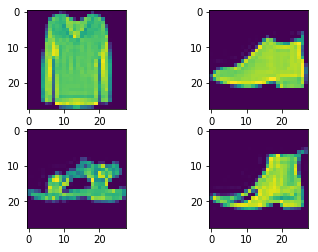

In [96]:
nrow = 2
ncol = 2

f, axarr = plt.subplots(nrow,ncol)

rand_choice = torch.randint(len(dataset), (nrow,ncol))

for i, axrow in enumerate(axarr):
    for j, ax in enumerate(axrow):
        ax.imshow(dataset[rand_choice[i][j]][0][0])

In [97]:
TRAIN_LOSS = []
VAL_LOSS = []
for epoch in range(100):
    
    sum_train_loss_in_batch = 0.
    sum_val_loss_in_batch = 0.
    
    for x, y in train_loader:
        
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_train_loss_in_batch += loss.item()
    
    with torch.no_grad():
        for x, y in val_loader:
            y_hat = model(x)
            loss = criterion(y_hat, y)
            sum_val_loss_in_batch += loss.item()
        
    train_loss_in_epoch = sum_train_loss_in_batch/train_batch_size
    val_loss_in_epoch = sum_val_loss_in_batch/val_batch_size
    
    TRAIN_LOSS.append(train_loss_in_epoch)
    VAL_LOSS.append(val_loss_in_epoch)
    
    print(f"Epoch {epoch} train loss: {train_loss_in_epoch} val loss: {val_loss_in_epoch}")

Epoch 0 train loss: 5.059506809106097 val loss: 2.256981200642056e-05
Epoch 1 train loss: 3.783242696430534 val loss: 1.9781604409217834e-05


KeyboardInterrupt: 

In [ ]:
datasetrand_choice

In [40]:
c.shape

torch.Size([1, 16, 9, 9])

In [41]:
mp = torch.nn.MaxPool2d(kernel_size=2, stride=2)

In [42]:
d = mp(c)

In [43]:
d.shape

torch.Size([1, 16, 4, 4])